In [1]:
#part 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')

Insurance = df.values[:, 1:-1]

df.info()
#age - numerical
#sex - categorical
#bmi - numerical
#children - numerical
#smoker - categorical
#region - categorical
#charges - numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
#part 2
df.isnull().sum()

#no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

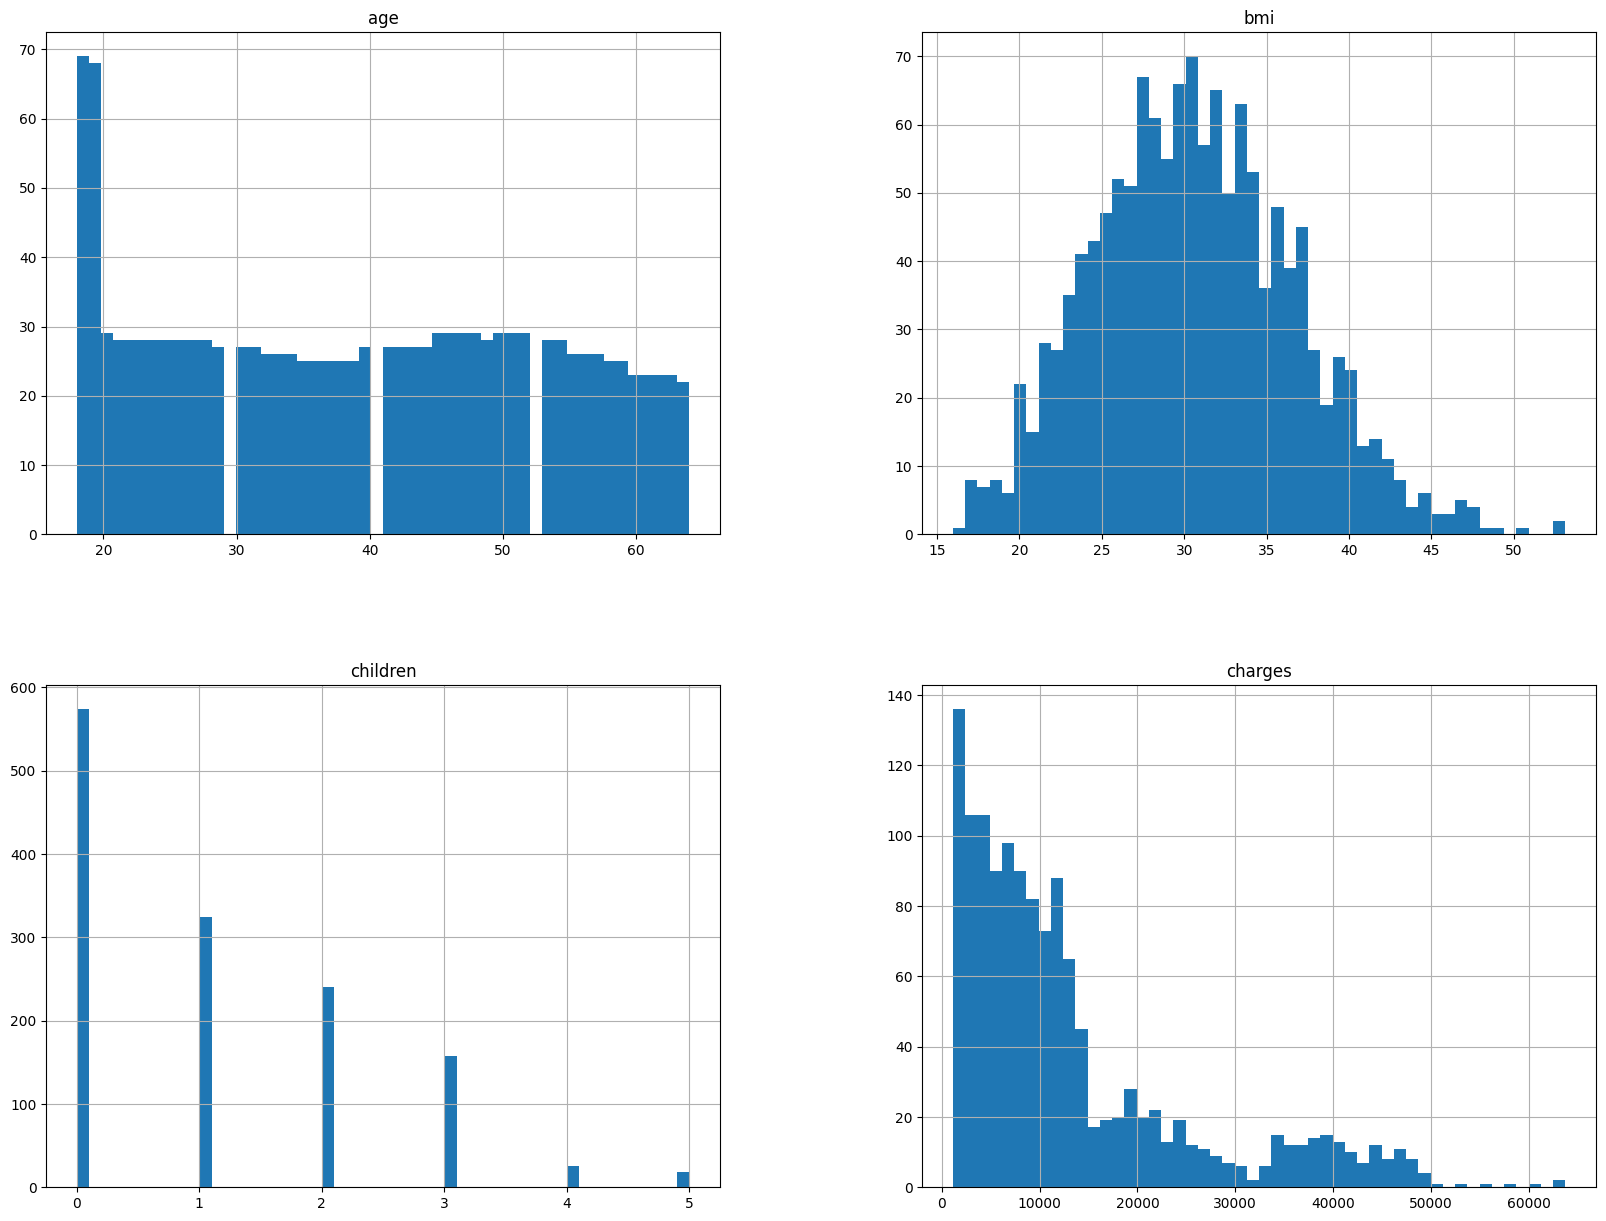

In [3]:
#part 3
df.hist(bins=50, figsize=(20,15))
plt.show


In [4]:
#part 4

hcorr = df[['age','bmi','children','charges']].corr()
hcorr.style.background_gradient()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


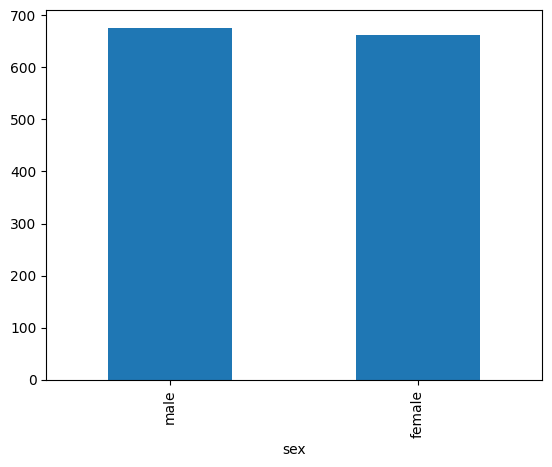

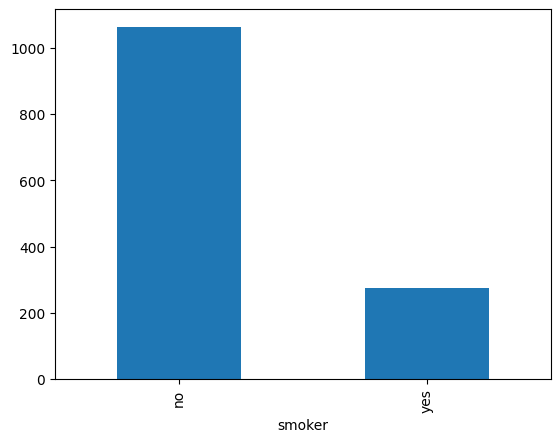

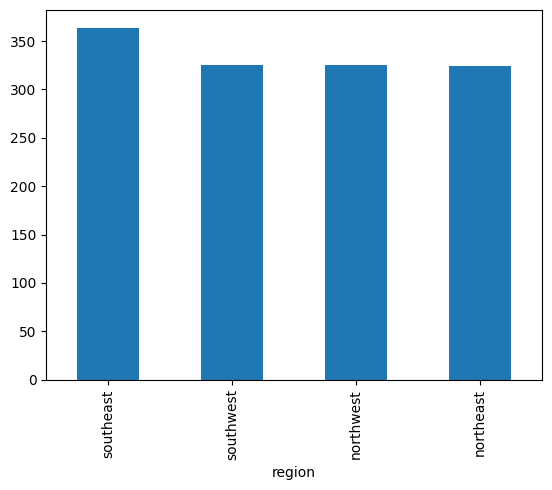

In [5]:
#part 5
df['sex'].value_counts().plot(kind = 'bar')
plt.show()

df['smoker'].value_counts().plot(kind = 'bar')
plt.show()

df['region'].value_counts().plot(kind = 'bar')
plt.show()


In [6]:
#part 6
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])

print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())


sex
1    676
0    662
Name: count, dtype: int64
smoker
0    1064
1     274
Name: count, dtype: int64
region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


In [8]:
#part 7
x_min = np.min(df, axis=0)
x_max = np.max(df, axis=0)

df = (df-x_min)/(x_max-x_min)
print('Scaling data')
print(df)


Scaling data
           age  sex       bmi  children  smoker    region   charges
0     0.021739  0.0  0.321227       0.0     1.0  1.000000  0.251611
1     0.000000  1.0  0.479150       0.2     0.0  0.666667  0.009636
2     0.217391  1.0  0.458434       0.6     0.0  0.666667  0.053115
3     0.326087  1.0  0.181464       0.0     0.0  0.333333  0.333010
4     0.304348  1.0  0.347592       0.0     0.0  0.333333  0.043816
...        ...  ...       ...       ...     ...       ...       ...
1333  0.695652  1.0  0.403820       0.6     0.0  0.333333  0.151299
1334  0.000000  0.0  0.429379       0.0     0.0  0.000000  0.017305
1335  0.000000  0.0  0.562012       0.0     0.0  0.666667  0.008108
1336  0.065217  0.0  0.264730       0.0     0.0  1.000000  0.014144
1337  0.934783  0.0  0.352704       0.0     1.0  0.333333  0.447249

[1338 rows x 7 columns]


In [9]:
#part 8
df.to_csv('insurancePP.csv', index='False')